In [2]:
import pandas as pd
import talib as tb
import numpy as np
import matplotlib.pyplot as plt
from talib import abstract

In [3]:
stocks = pd.read_excel("sz50.xlsx", None, index_col='datetime');

## 题目一

In [4]:
stocks.keys()

odict_keys(['600000.XSHG', '600016.XSHG', '600028.XSHG', '600029.XSHG', '600030.XSHG', '600036.XSHG', '600048.XSHG', '600050.XSHG', '600100.XSHG', '600104.XSHG', '600111.XSHG', '600340.XSHG', '600485.XSHG', '600518.XSHG', '600519.XSHG', '600547.XSHG', '600606.XSHG', '600837.XSHG', '600887.XSHG', '600919.XSHG', '600958.XSHG', '600999.XSHG', '601006.XSHG', '601088.XSHG', '601166.XSHG', '601169.XSHG', '601186.XSHG', '601198.XSHG', '601211.XSHG', '601229.XSHG', '601288.XSHG', '601318.XSHG', '601328.XSHG', '601336.XSHG', '601390.XSHG', '601398.XSHG', '601601.XSHG', '601628.XSHG', '601668.XSHG', '601688.XSHG', '601766.XSHG', '601788.XSHG', '601800.XSHG', '601818.XSHG', '601857.XSHG', '601881.XSHG', '601901.XSHG', '601985.XSHG', '601988.XSHG', '601989.XSHG'])

## 题目二

In [5]:
stock_600036 = stocks['600036.XSHG']

In [6]:
stock_600036['MA10_rolling'] = pd.rolling_mean(stock_600036['close'],10)

AttributeError: module 'pandas' has no attribute 'rolling_mean'

In [7]:
close = np.array(stock_600036['close'])

In [8]:
stock_600036['MA10_talib'] = tb.MA(close, timeperiod=10)

In [9]:
MA10_talib = tb.MA(close, timeperiod=10)

In [10]:
MA10_talib[-5:]

array([108.35 , 108.741, 109.176, 110.102, 111.666])

## 题目三

In [11]:
stock_600036.head()

,close,high,low,open,volume,MA10_talib
datetime,,,,,,
2017-01-03 15:00:00,69.31,69.39,67.80,67.92,30449820,NaN
2017-01-04 15:00:00,69.42,69.89,68.88,69.08,25665746,NaN
2017-01-05 15:00:00,69.85,70.27,69.58,69.66,24562635,NaN
2017-01-06 15:00:00,69.35,70.08,69.31,69.85,17487854,NaN
2017-01-09 15:00:00,69.23,69.96,69.12,69.66,17341504,NaN


In [12]:
MA_series = stock_600036['MA10_talib']

In [13]:
price = stock_600036['close']

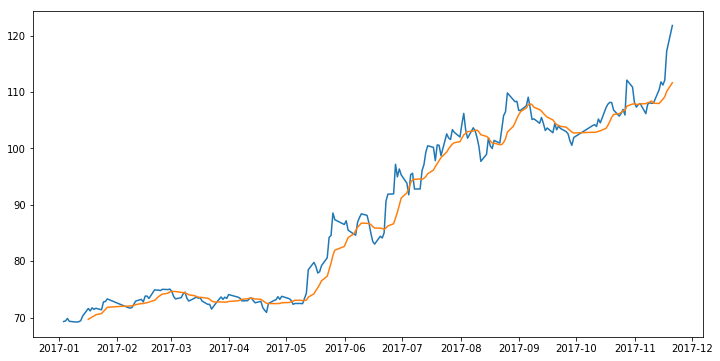

In [14]:
plt.figure(figsize=(12, 6))
plt.plot(price)
plt.plot(MA_series)
plt.show()

# 题目四

In [15]:
stock_dicts = dict()
for name, data in stocks.items():
    try:
        index = data.index
        stock_dicts[name] = pd.Series(tb.ROCR100(data.close.values, timeperiod = 5), index = index)
    except Exception as e:
        print(name, str(e))
        pass

600485.XSHG 'DataFrame' object has no attribute 'close'


In [16]:
df = pd.DataFrame(stock_dicts)

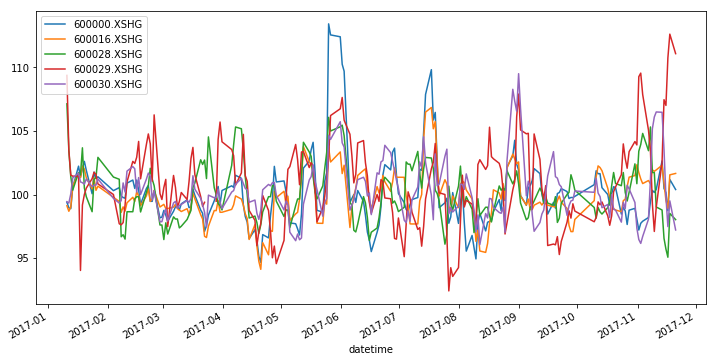

In [17]:
df[df.columns[:5]].plot(figsize = (12, 6))
plt.show()

# 题目五

In [18]:
stock_dicts = dict()
for name, data in stocks.items():
    try:
        stock_dicts[name] = abstract.MACD(data, 7)
    except Exception as e:
        print(name, str(e))
        pass
panel = pd.Panel(stock_dicts)
p_transpos = panel.transpose(2,1,0).to_frame()
p_transpos

600485.XSHG input_arrays parameter missing required data key: close


D:\anaco\lib\site-packages\IPython\core\interactiveshell.py:3267: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  exec(code_obj, self.user_global_ns, self.user_ns)
D:\anaco\lib\site-packages\pandas\core\panel.py:1268: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  return super(Panel, self).transpose(*axes, **kwargs)


macd  macdsignal   macdhist
datetime            minor                                        
2017-02-24 15:00:00 600000.XSHG   0.885149    1.353338  -0.468190
                    600016.XSHG  -0.298144   -0.124979  -0.173165
                    600028.XSHG   0.004228   -0.008495   0.012723
                    600029.XSHG   0.364191    0.193796   0.170395
                    600030.XSHG   0.786378    0.853189  -0.066812
                    600036.XSHG   1.731825    1.521027   0.210798
                    600048.XSHG   3.592422    2.898336   0.694085
                    600050.XSHG  -0.047530   -0.131068   0.083537
                    600100.XSHG   0.983867    0.663240   0.320626
                    600104.XSHG   3.190387    2.211466   0.978921
                    600111.XSHG   3.745955    3.509425   0.236530
                    600340.XSHG  13.364841   10.425836   2.939005
                    600518.XSHG   0.208008    0.632526  -0.424518
                    600519.XSHG  38.154669   14.598918  23.555751
                    600547.XSHG  -0.543816    1.089355  -1.633171
                    600606.XSHG   0.432245    0.522509  -0.090263
                    600837.XSHG  -2.697324   -2.473646  -0.223678
                    600887.XSHG   8.474823    5.708411   2.766412
                    600919.XSHG   0.314160    0.288820   0.025340
                    600999.XSHG   0.274835    0.282612  -0.007777
                    601006.XSHG  -0.150461   -0.186775   0.036314
                    601088.XSHG   0.159565    0.258900  -0.099335
                    601166.XSHG   0.588070    0.598758  -0.010688
                    601169.XSHG   0.203600    0.180747   0.022853
                    601186.XSHG   0.477952    0.557823  -0.079871
                    601198.XSHG   0.110686    0.063973   0.046712
                    601211.XSHG   0.222932    0.214438   0.008494
                    601229.XSHG   0.616766    0.568327   0.048440
                    601288.XSHG   0.071761    0.070651   0.001110
                    601318.XSHG   0.776052    0.675313   0.100739
...                                    ...         ...        ...
2017-11-20 15:00:00 600958.XSHG  -0.020669   -0.004623  -0.016046
                    600999.XSHG  -0.383244   -0.477021   0.093777
                    601006.XSHG  -0.032230   -0.066243   0.034013
                    601088.XSHG   1.758617    1.142392   0.616225
                    601166.XSHG  -0.380423   -0.776519   0.396095
                    601169.XSHG  -0.041612   -0.124288   0.082676
                    601186.XSHG  -0.185747   -0.100157  -0.085590
                    601198.XSHG  -0.294129   -0.351471   0.057342
                    601211.XSHG  -0.275096   -0.351055   0.075959
                    601229.XSHG  -0.996025   -0.550746  -0.445279
                    601288.XSHG  -0.070525   -0.073471   0.002946
                    601318.XSHG  14.085531   11.173948   2.911583
                    601328.XSHG  -0.093535   -0.125224   0.031688
                    601336.XSHG   4.798085    3.601142   1.196943
                    601390.XSHG  -0.118984   -0.034240  -0.084744
                    601398.XSHG  -0.057319   -0.078567   0.021248
                    601601.XSHG   3.594934    2.853963   0.740971
                    601628.XSHG   2.095656    2.092793   0.002863
                    601668.XSHG  -0.112734   -0.067963  -0.044771
                    601688.XSHG  -0.680742   -0.631986  -0.048756
                    601766.XSHG   0.033935    0.248510  -0.214575
                    601788.XSHG  -0.189373   -0.170507  -0.018865
                    601800.XSHG  -0.535417   -0.369372  -0.166045
                    601818.XSHG  -0.000822   -0.026838   0.026015
                    601857.XSHG  -0.025618    0.077459  -0.103077
                    601881.XSHG  -0.708704   -0.575331  -0.133373
                    601901.XSHG  -0.163255   -0.115435  -0.047819
                    601985.XSHG  -0.065767    0.016787  -0.082554
            